### Quickstart

![](images/light_fm.png)

[Source](https://github.com/lyst/lightfm)

```sh
pip install lightfm
```

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

data = fetch_movielens(min_rating=5.0)
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

precision_at_k(model, data['test'], k=5).mean()

0.049141355

In [3]:
data

{'train': <943x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 19048 stored elements in COOrdinate format>,
 'test': <943x1682 sparse matrix of type '<class 'numpy.int32'>'
 	with 2153 stored elements in COOrdinate format>,
 'item_features': <1682x1682 sparse matrix of type '<class 'numpy.float32'>'
 	with 1682 stored elements in Compressed Sparse Row format>,
 'item_feature_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object),
 'item_labels': array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
        'Sliding Doors (1998)', 'You So Crazy (1994)',
        'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)}

In [4]:
data['train']

<943x1682 sparse matrix of type '<class 'numpy.float32'>'
	with 19048 stored elements in COOrdinate format>

### Data

![](images/candy.jpg)

![](images/influenster.png)

### Structure

In [5]:
import pandas as pd

df = pd.read_csv('data/candy.csv')

df.sample(5)

,item,user,review
12262,Sour Patch Kids Candy,hugheswilliam,4
5478,Sour Patch Strawberry Candy,wallderrick,5
6107,Red Vines Original Red,aclarke,5
12327,York Peppermint Patty,lisa94,5
431,Hershey's Milk Chocolate Bar,rangelkeith,5


In [6]:
df[df['user'] == 'zjohnson']

,item,user,review
2186,Skittles Sour Candy,zjohnson,5
6022,Haribo Sour Gold Bears Gummi Candy,zjohnson,5
7919,Starburst Original Fruit Chews,zjohnson,5
8382,Sour Patch Watermelon,zjohnson,5
12304,Sour Patch Kids Candy,zjohnson,4


In [7]:
df['item'].value_counts()[:5]

Twix                                       340
Snickers Chocolate Bar                     330
Werther's Original Caramel Hard Candies    322
M&Ms Peanut Chocolate Candy                310
M&Ms Milk Chocolate Candy                  273
Name: item, dtype: int64

In [8]:
df['item'].unique().shape

(142,)

In [9]:
df['user'].unique().shape

(2531,)

In [10]:
df['review'].value_counts()

5    12977
4     2554
3      967
2      372
1      364
Name: review, dtype: int64

In [11]:
df.groupby('user')['item'].count().mean()

6.809166337416041

### Back to `data['train']`

In [12]:
data['train']

<943x1682 sparse matrix of type '<class 'numpy.float32'>'
	with 19048 stored elements in COOrdinate format>

In [13]:
data['train'].todense()

matrix([[5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 5., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
data['item_labels']

array(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)', ...,
       'Sliding Doors (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'], dtype=object)

### Sparsity

In [15]:
ex = pd.DataFrame([
    [0, 1, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1]], 
    columns=['twix', 'mars', 'reeses', 'skittles', 'snickers', 'lindt'])

ex

,twix,mars,reeses,skittles,snickers,lindt
0,0,1,1,0,0,0
1,0,1,1,1,0,0
2,1,0,0,1,0,0
3,0,1,1,0,0,1
4,0,0,0,1,1,1


In [16]:
r, c = ex.shape
ex.sum().sum() / (r * c)

0.43333333333333335

In [17]:
import sys

sys.getsizeof(ex)

400

In [18]:
ex.values

array([[0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1, 1]])

In [19]:
from scipy.sparse import csc_matrix

sx = csc_matrix(ex.values)

In [20]:
sys.getsizeof(sx)

64

...

In [21]:
movie_lens = pd.DataFrame(data['train'].todense(), columns=data['item_labels'])

In [22]:
movie_lens.head()

,Toy Story (1995),GoldenEye (1995),Four Rooms (1995),Get Shorty (1995),Copycat (1995),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Twelve Monkeys (1995),Babe (1995),Dead Man Walking (1995),Richard III (1995),...,Mirage (1995),Mamma Roma (1962),"Sunchaser, The (1996)","War at Home, The (1996)",Sweet Nothing (1995),Mat' i syn (1997),B. Monkey (1998),Sliding Doors (1998),You So Crazy (1994),Scream of Stone (Schrei aus Stein) (1991)
0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
sys.getsizeof(movie_lens)

6344664

In [24]:
sys.getsizeof(data['train'])

64

### Sparse Candy

In [25]:
df.sample(5)

,item,user,review
9931,Mars Candy Fun Size Mix Peanut And Peanut Butt...,rkane,5
6985,Reese's Peanut Butter Cups Miniatures,jessica32,5
14063,Jet Puffed Regular Everyday Marshmallows,dennis03,4
15942,Hershey's Kisses Milk Chocolates with Almonds,jlin,5
16020,Warheads Extreme Sour Hard Candy,gallagherbrittany,2


In [26]:
# don't do this!

df.pivot_table(index='user', columns='item', values='review').fillna(0)

item,3 Musketeers Candy Bar,3 Musketeers Miniature Bars,5 Gum,Airheads Bites Fruit,Airheads White Mystery,Airheads Xtremes Sweetly Sour Candy Rainbow Berry,Almond Joy Snack Size Bites,Altoids Curiously Strong Cinnamon Mints,Bouquet of Fruits Valentine Chocolate Dipped Strawberries,Brachs Candy Corn,...,Trolli Sour Brite Crawlers,Trolli Sour Brite Eggs Candy,Twix,Twix Bites,Twizzlers Bites Cherry Gummy Candy,Twizzlers Pull-N-Peel Candy Cherry,Twizzlers Twists Strawberry,Warheads Extreme Sour Hard Candy,Werther's Original Caramel Hard Candies,York Peppermint Patty
user,,,,,,,,,,,,,,,,,,,,,
aaron67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abarker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abigail04,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zsellers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
zsimpson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
zsmith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from scipy.sparse import csr_matrix

help(csr_matrix)

Help on class csr_matrix in module scipy.sparse.csr:

class csr_matrix(scipy.sparse.compressed._cs_matrix)
 |  csr_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  Compressed Sparse Row matrix
 |  
 |  This can be instantiated in several ways:
 |      csr_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csr_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsr())
 |  
 |      csr_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csr_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSR representation where the column indices for
 |          row i are stored in ``indices[indptr[i]:indptr[i+1]]`` and their
 | 

In [28]:
import numpy as np

In [29]:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])

csr_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[1, 0, 2],
       [0, 0, 3],
       [4, 5, 6]], dtype=int64)

In [30]:
ratings = 'review'
users = 'user'
items = 'item'

ratings = np.array(df[ratings])
users = np.array(df[users])
items = np.array(df[items])

In [31]:
users

array(['darlene90', 'taylordarlene', 'aliciadennis', ..., 'powellmegan',
       'benjaminjohnson', 'xrichards'], dtype=object)

In [32]:
items

array(["Reese's Peanut Butter Cups Miniatures",
       "Reese's Peanut Butter Cups Miniatures",
       "Reese's Peanut Butter Cups Miniatures", ...,
       "Hershey's Nuggets Chocolate Assortment",
       "Hershey's Nuggets Chocolate Assortment",
       "Hershey's Nuggets Chocolate Assortment"], dtype=object)

In [34]:
ratings

array([5, 4, 5, ..., 5, 5, 5])

### First Try

In [35]:
csr_matrix((ratings, (users, items)), shape=(len(users), len(items)))

ValueError: invalid literal for int() with base 10: 'darlene90'

### Second Try

(Everything needs to be a number)

In [36]:
from sklearn.preprocessing import LabelEncoder

# heavy lifting encoders
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

# preparation for the csr matrix
u = user_encoder.fit_transform(users)
i = item_encoder.fit_transform(items)
lu = len(np.unique(u))
li = len(np.unique(i))

In [37]:
interactions = csr_matrix((ratings, (u, i)), shape=(lu, li))

In [38]:
interactions

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 17199 stored elements in Compressed Sparse Row format>

In [39]:
# don't do this...

interactions.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 5],
        [0, 0, 0, ..., 0, 0, 5]], dtype=int64)

In [40]:
item_encoder.classes_[:10]

array(['3 Musketeers Candy Bar', '3 Musketeers Miniature Bars', '5 Gum',
       'Airheads Bites Fruit', 'Airheads White Mystery',
       'Airheads Xtremes Sweetly Sour Candy Rainbow Berry',
       'Almond Joy Snack Size Bites',
       'Altoids Curiously Strong Cinnamon Mints',
       'Bouquet of Fruits Valentine Chocolate Dipped Strawberries',
       'Brachs Candy Corn'], dtype=object)

### Interaction Machine

In [41]:
class InteractionMachine:
    def __init__(self):
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()

    def __repr__(self):
        return 'InteractionMachine()'

    def build(self, users, items, ratings):
        u = self.user_encoder.fit_transform(users)
        i = self.item_encoder.fit_transform(items)
        self.n_users = len(np.unique(u))
        self.n_items = len(np.unique(i))
        self.interactions = csr_matrix((ratings, (u, i)), shape=(self.n_users, self.n_items))
        return self

In [42]:
im = InteractionMachine()

im.build(df['user'], df['item'], df['review'])

interactions = im.interactions

In [43]:
interactions.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 5]], dtype=int64)

### Basic LightFM 

In [44]:
model = LightFM()

In [45]:
model.fit(interactions)

In [46]:
model.predict(interactions) # not exactly sklearn...

TypeError: predict() missing 1 required positional argument: 'item_ids'

In [47]:
im.user_encoder.transform(['zsmith'])

array([2528])

In [49]:
im.item_encoder.classes_[:10]

array(['3 Musketeers Candy Bar', '3 Musketeers Miniature Bars', '5 Gum',
       'Airheads Bites Fruit', 'Airheads White Mystery',
       'Airheads Xtremes Sweetly Sour Candy Rainbow Berry',
       'Almond Joy Snack Size Bites',
       'Altoids Curiously Strong Cinnamon Mints',
       'Bouquet of Fruits Valentine Chocolate Dipped Strawberries',
       'Brachs Candy Corn'], dtype=object)

In [50]:
im.item_encoder.transform(['M&Ms Peanut Chocolate Candy'])

array([74])

In [51]:
im.item_encoder.transform(['Skittles Sour Candy'])

array([103])

In [52]:
im.item_encoder.transform(['Juicy Fruit Gum'])

array([55])

In [53]:
model.predict(2528, [74, 103, 55])

array([1.44036436, 1.24694335, 0.88677704])

### Evaluation

In [54]:
from lightfm.evaluation import auc_score, precision_at_k

> AUC measures the quality of the overall ranking. In the binary case, it can be interpreted as the probability that a randomly chosen positive item is ranked higher than a randomly chosen negative item. Consequently, an AUC close to 1.0 will suggest that, by and large, your ordering is correct: and this can be true even if none of the first K items are positives. This metric may be more appropriate if you do not exert full control on which results will be presented to the user; it may be that the first K recommended items are not available any more (say, they are out of stock), and you need to move further down the ranking. A high AUC score will then give you confidence that your ranking is of high quality throughout.

[Source](https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model)

> Precision@K measures the proportion of positive items among the K highest-ranked items. As such, it's very focused on the ranking quality at the top of the list: it doesn't matter how good or bad the rest of your ranking is as long as the first K items are mostly positive. This would be an appropriate metric if you are only ever going to be showing your users the very top of the list.

[Source](https://stackoverflow.com/questions/45451161/evaluating-the-lightfm-recommendation-model)

In [55]:
auc_score(model, interactions).mean()

0.6518258

In [56]:
precision_at_k(model, interactions, k=10).mean()

0.11090478

### train-test-split

In [57]:
# don't do this...
from sklearn.model_selection import train_test_split

In [58]:
train_test_split(interactions)
# because...

[<1898x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 12911 stored elements in Compressed Sparse Row format>,
 <633x142 sparse matrix of type '<class 'numpy.int64'>'
 	with 4288 stored elements in Compressed Sparse Row format>]

### Traditional 

![](images/tts_traditional.png)

### Recommendation

![](images/tts_reco.png)

In [59]:
# do this
from lightfm.cross_validation import random_train_test_split

In [60]:
train, test = random_train_test_split(interactions, test_percentage=0.2)

In [61]:
train

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 13759 stored elements in COOrdinate format>

In [62]:
test

<2531x142 sparse matrix of type '<class 'numpy.int64'>'
	with 3440 stored elements in COOrdinate format>

### Training Cycle

In [63]:
model = LightFM()
model.fit(train, epochs=500)

In [64]:
auc_score(model, test).mean()

0.66829705

In [65]:
model = LightFM()

scores = []
for e in range(100):
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    scores.append((auc_train, auc_test))
    
scores = np.array(scores)

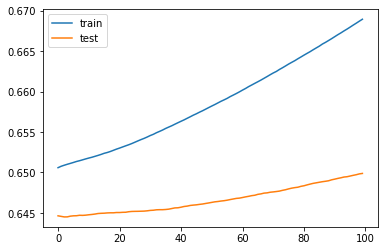

In [66]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(scores[:, 0], label='train')
plt.plot(scores[:, 1], label='test')
plt.legend()

### Loss

> WARP: Weighted Approximate-Rank Pairwise loss. Maximises
  the rank of positive examples by repeatedly sampling negative
  examples until rank violating one is found. Useful when only
  positive interactions are present and optimising the top of
  the recommendation list (precision@k) is desired.

In [67]:
model = LightFM(loss='warp')

scores = []
for e in range(100):
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    scores.append((auc_train, auc_test))
    
scores = np.array(scores)

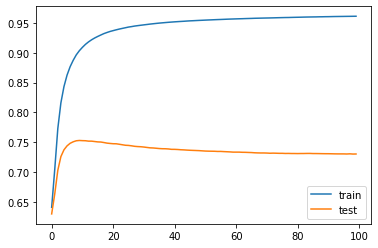

In [68]:
from matplotlib import pyplot as plt

plt.plot(scores[:, 0], label='train')
plt.plot(scores[:, 1], label='test')
plt.legend()

### Activity

Take 5 minutes to explore different epoch and loss combinations

### Early Stopping

In [69]:
from copy import deepcopy

model = LightFM(loss='warp')

count = 0
best = 0
scores = []
for e in range(100):
    if count > 5: # patience
        break
    model.fit_partial(train, epochs=1)
    auc_train = auc_score(model, train).mean()
    auc_test = auc_score(model, test).mean()
    print(f'Epoch: {e}, Train AUC={auc_train:.3f}, Test AUC={auc_test:.3f}')
    scores.append((auc_train, auc_test))
    if auc_test > best:
        best_model = deepcopy(model)
        best = auc_test
    else:
        count += 1

model = deepcopy(best_model)

Epoch: 0, Train AUC=0.647, Test AUC=0.629
Epoch: 1, Train AUC=0.725, Test AUC=0.679
Epoch: 2, Train AUC=0.783, Test AUC=0.717
Epoch: 3, Train AUC=0.816, Test AUC=0.733
Epoch: 4, Train AUC=0.838, Test AUC=0.742
Epoch: 5, Train AUC=0.855, Test AUC=0.748
Epoch: 6, Train AUC=0.867, Test AUC=0.751
Epoch: 7, Train AUC=0.878, Test AUC=0.752
Epoch: 8, Train AUC=0.886, Test AUC=0.753
Epoch: 9, Train AUC=0.894, Test AUC=0.754
Epoch: 10, Train AUC=0.900, Test AUC=0.754
Epoch: 11, Train AUC=0.905, Test AUC=0.754
Epoch: 12, Train AUC=0.910, Test AUC=0.754
Epoch: 13, Train AUC=0.914, Test AUC=0.753
Epoch: 14, Train AUC=0.917, Test AUC=0.751
Epoch: 15, Train AUC=0.920, Test AUC=0.750
Epoch: 16, Train AUC=0.923, Test AUC=0.749


### New Predictions

In [70]:
user = 'aaron67'
df[df['user'] == user]

,item,user,review
13806,Mike and Ike Sour Licious Zours,aaron67,4
14073,Kit Kat Minis Crisp Wafers in Milk Chocolate,aaron67,5
14396,Reese's Peanut Butter Cup Pumpkins Milk Chocolate,aaron67,5
15153,Snickers Crisper Chocolate Bar,aaron67,1
15296,Snickers Peanut Butter Squared Bars,aaron67,5
16867,Reese's Peanut Butter Heart,aaron67,5


In [71]:
im.user_encoder.transform([user])[0]

0

In [72]:
user_id = im.user_encoder.transform([user])[0]

In [73]:
preds = model.predict(user_id, list(range(im.n_items)))
preds = pd.DataFrame(zip(preds, im.item_encoder.classes_), columns=['pred', 'item'])
preds = preds.sort_values('pred', ascending=False)
preds.head()

,pred,item
95,0.393275,Reese's Peanut Butter Egg
48,0.389251,Hershey's Whoppers Malted Milk Balls
43,0.377534,Hershey's Natural Unsweetened Cocoa
19,0.365202,Dove Chocolate Promises Silky Smooth Milk Choc...
47,0.355653,Hershey's Variety Pack Assortment


In [74]:
tried = df[df['user'] == user]['item'].values
list(preds[~preds['item'].isin(tried)]['item'].values[:5])

["Reese's Peanut Butter Egg",
 "Hershey's Whoppers Malted Milk Balls",
 "Hershey's Natural Unsweetened Cocoa",
 'Dove Chocolate Promises Silky Smooth Milk Chocolate',
 "Hershey's Variety Pack Assortment"]

### New Users

![](images/willy.jpg)

### Unless...

In [ ]:
ex = pd.DataFrame([
    [0, 1, 1, 0, 0, 0], 
    [0, 1, 1, 1, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 1]
])

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(ex)

In [ ]:
df = pd.read_csv("data/candy.csv")
df = df[df['review'] >= 4]

In [ ]:
df.sample(5)

In [ ]:
df = df.groupby(["user"])["item"].apply(lambda x: ",".join(x))
df = pd.DataFrame(df)
df.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=lambda x: x.split(","), max_features=250)
X = cv.fit_transform(df['item'])

In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
nn.fit(X)

In [ ]:
neighbors = nn.kneighbors(X, return_distance=False)
neighbors

In [ ]:
neighbors[0]

In [ ]:
candy = []
for n in neighbors[0]:
    c = df.iloc[int(n)].values[0].split(",")
    candy.extend(c)
    
list(set(candy))

### Putting a bow on it

In [ ]:
df = pd.read_csv("data/candy.csv")
df = df[df['review'] >= 4]
df = df.groupby(["user"])["item"].apply(lambda x: ",".join(x))
df = pd.DataFrame(df)
df.head()

In [ ]:
class NNRecommender:
    def __init__(
        self, n_neighbors=5, max_features=250, tokenizer=lambda x: x.split(",")):
        self.cv = CountVectorizer(tokenizer=tokenizer, max_features=max_features)
        self.nn = NearestNeighbors(n_neighbors=n_neighbors)

    def fit(self, X):
        self.X = X
        X = self.cv.fit_transform(X)
        self.nn.fit(X)
        return self

    def predict(self, X):
        Xp = []
        for Xi in X:
            Xt = self.cv.transform([Xi])
            neighbors = self.nn.kneighbors(Xt, return_distance=False)
            repos = []
            for n in neighbors[0]:
                r = self.X.iloc[int(n)].split(",")
                repos.extend(r)
            repos = list(set(repos))
            repos = [r for r in repos if r not in Xi.split(",")]
            Xp.append(repos)
        return Xp

In [ ]:
n_neighbors = 5
max_features = 250
model = NNRecommender(n_neighbors, max_features)
model.fit(df["item"])

In [ ]:
df.sample(1)['item'].values

In [ ]:
sweet = ["Airheads Xtremes Sweetly Sour Candy Rainbow Berry,Life Savers Five Flavor Gummies,Twizzlers Pull-N-Peel Candy Cherry"]

In [ ]:
peanut = ["Reese's Peanut Butter Cups Miniatures,M&Ms Peanut Chocolate Candy,Reese's Peanut Butter Big Cup"]

In [ ]:
im.item_encoder.classes_

In [ ]:
model.predict(sweet)

In [ ]:
model.predict(peanut)

![](images/the_end.jpg)

### Links

**Max Humber** 

- [Twitter](https://twitter.com/maxhumber)
- [LinkedIn](https://www.linkedin.com/in/maxhumber/)
- [GitHub](https://github.com/maxhumber)

**Open Source**

- [marc](https://github.com/maxhumber/marc) - (**mar**kov **c**hain) is a small, but flexible Markov chain generator.
- [gazpacho](https://github.com/maxhumber/gazpacho) - is a web scraping library. You should use it!
- [mummify](https://github.com/maxhumber/mummify) - makes model prototyping faster. 
- [chart](https://github.com/maxhumber/chart) - a zero-dependency python package that prints basic charts to a Jupyter output

- [recommend](https://github.com/maxhumber/recommend) - basically this presentation (super beta right now)

#### Upcoming

### Appendix

For when your data looks like this...

In [ ]:
df = pd.read_csv('data/candy.csv')
df = df[df['user'].isin(df['user'].sample(10))]
df = df.pivot(index='item', columns='user', values='review')
df = df.reset_index()
df.head(5)

Do this...

In [ ]:
df = df.melt(id_vars='item', var_name='user', value_name='review')
df = df.dropna().reset_index(drop=True)

df.head(5)

### Parting Thoughts

![](images/savage.png)

[Source](https://news.ycombinator.com/item?id=20495047)